# Preliminary Data exploration

Dataset met alle metadata en preprocessing steps binnenhalen.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("../Materials/KVO_META.csv", encoding='Latin-1', index_col=False)
df['Genre'] = df['genre'].str.lower()
sns.set_palette("Set2")

In [9]:
for column in df.columns:
    try:
        df[column] = df[column].str.strip()
    except AttributeError:
        continue

In [10]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

## TOP 10
### Productions


<AxesSubplot:>

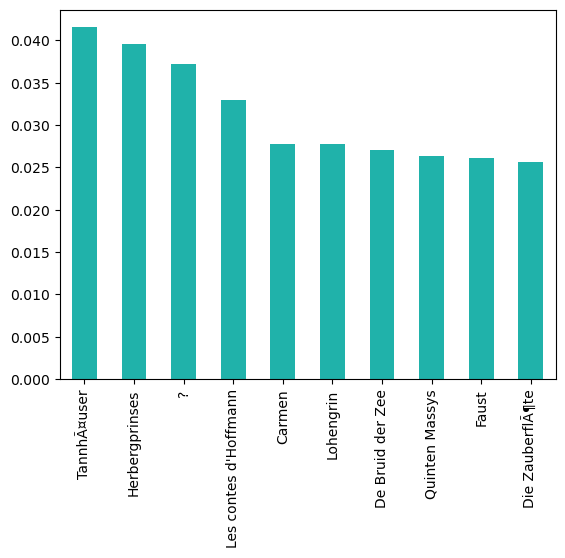

In [11]:
df['Original title'].value_counts(normalize=True).head(10).plot(kind='bar', color = 'lightseagreen')
#top 10 meest gespeelde producties


### Composers

<AxesSubplot:title={'center':'% of 10 most common composers in entire dataset'}>

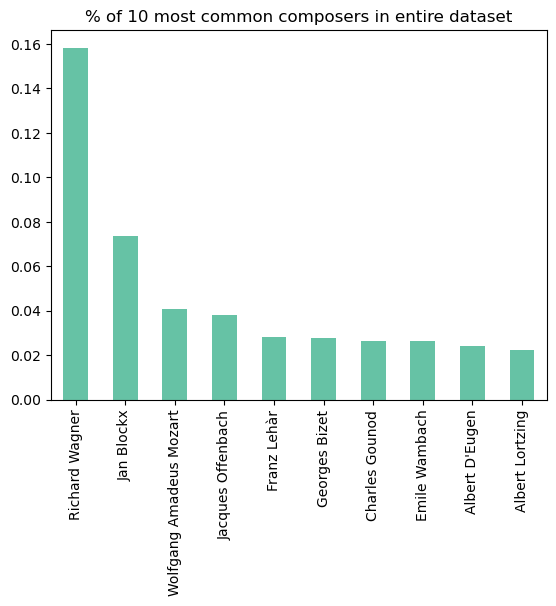

In [12]:
df['Composer'].value_counts(normalize=True).head(10).plot(kind = 'bar', title = '% of 10 most common composers in entire dataset')

### Dutch Composers

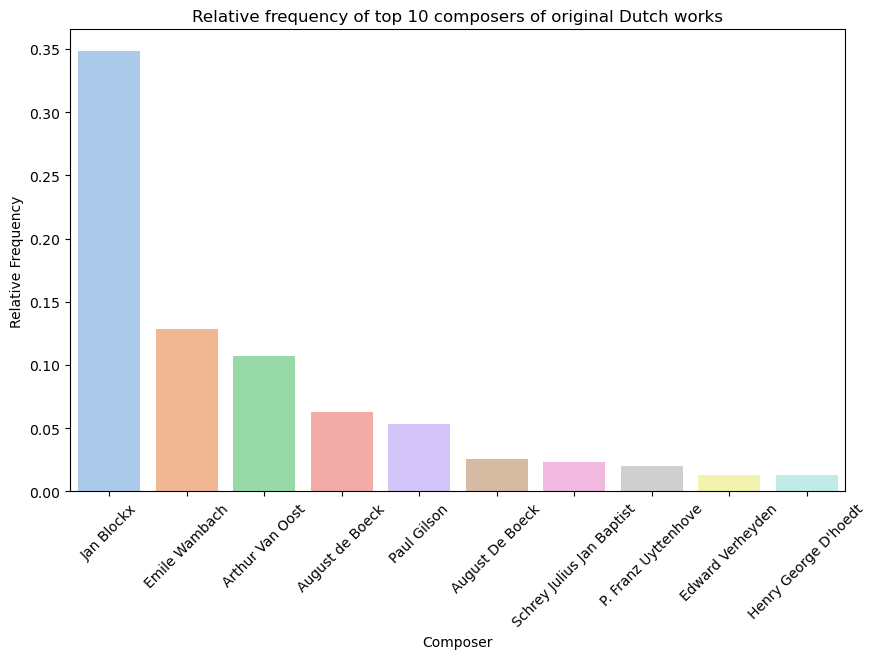

In [13]:
df2 = df[df["Original language"] == 'NL']
nl = df2['Composer'].value_counts(normalize=True).head(10)
plt.figure(figsize=(10,6))
ax = sns.barplot(x=nl.index, y=nl.values, palette='pastel')
plt.title('Relative frequency of top 10 composers of original Dutch works')
plt.xlabel('Composer')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)
plt.show()



## Distribution of Wagner productions

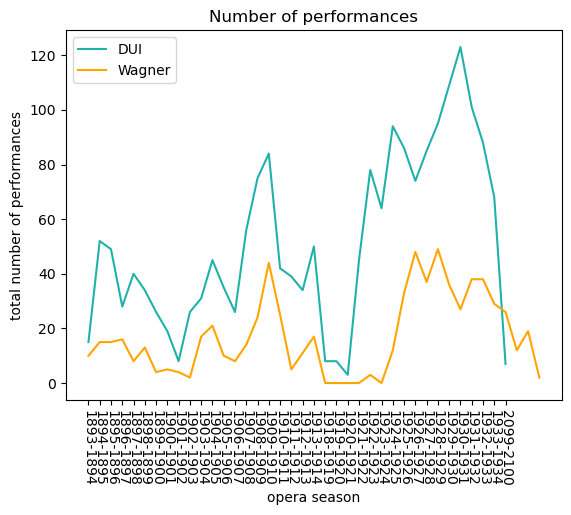

In [23]:
import matplotlib.pyplot as plt

# Create a figure and axes object
fig, ax = plt.subplots()

DUI = df[df["Original language"] == 'DUI']
counts1 = DUI['Season'].value_counts().sort_index(axis=0)

# Sorting the index to ensure correct order of data points in the line plot
counts1 = counts1.sort_index()

# Plotting the first line chart
counts1.plot(kind='line', color='lightseagreen', ax=ax, label='DUI')

wagner = df[df["Composer"] == 'Richard Wagner']
counts2 = wagner['Season'].value_counts().sort_index(axis=0)

# Adding a row for the missing season with a value of zero
counts2.loc['1914-1915'] = 0
counts2.loc['1915-1916'] = 0
counts2.loc['1916-1917'] = 0
counts2.loc['1917-1918'] = 0
counts2.loc['1919-1920'] = 0

# Sorting the index to ensure correct order of data points in the line plot
counts2 = counts2.sort_index()

# Plotting the second line chart
counts2.plot(kind='line', color='orange', ax=ax, label='Wagner')

# Add labels and title to the plot
ax.set_xlabel('opera season')
ax.set_ylabel('total number of performances')
ax.set_xticks(range(len(counts1.index)))
ax.set_xticklabels(counts1.index,  rotation = -90)
ax.set_title('Number of performances')

# Display the legend
ax.legend()

# Show the plot
plt.show()


## Normalised distribution of composers

c:\Users\monaa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\monaa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\monaa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\monaa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 155 (\x9b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\monaa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\monaa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  f

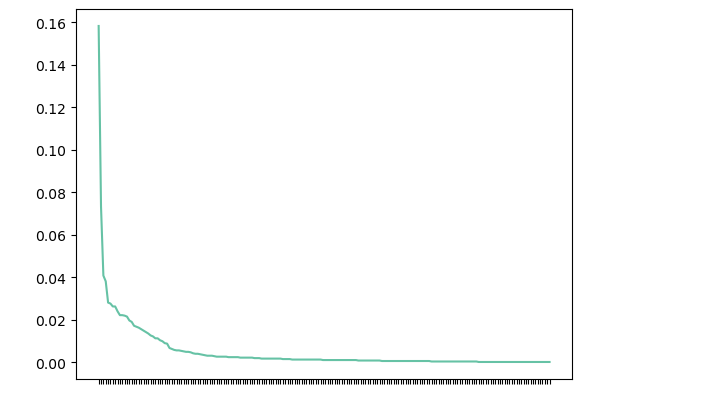

In [ ]:
comp_dis = df['Composer'].value_counts(normalize=True)
plt.plot(comp_dis)
plt.xticks(color='white')
plt.show()

### wereldpremière -> first occurence in Antwerp Opera

In [ ]:
eerste_voorkomen = []
for item in df.groupby('Original title')['Date'].min():
    eerste_voorkomen.append(item)


premiere = []
for item in df.groupby('Original title')['Original premiere'].min():
    premiere.append(item)


premiere = pd.to_datetime(pd.Series(premiere), dayfirst=True, errors='coerce');
eerste_voorkomen = pd.to_datetime(pd.Series(eerste_voorkomen), dayfirst=True, errors='coerce');

print(len(eerste_voorkomen) == len(premiere))


True


In [ ]:
result = []
x = dict(zip(premiere, eerste_voorkomen))
for key, value in x.items():
    try:
        result.append(int(value.year) - int(key.year))
    except ValueError:
        continue
    

In [ ]:
max(result)

168

In [ ]:
# Het duurt gemiddeld 45 jaar
def Average(lst):
    return sum(lst) / len(lst)

round(Average(result), 2)

40.38